In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprjcpp_4r/ah1xajru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprjcpp_4r/cj869zq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67614', 'data', 'file=/tmp/tmprjcpp_4r/ah1xajru.json', 'init=/tmp/tmprjcpp_4r/cj869zq0.json', 'output', 'file=/tmp/tmprjcpp_4r/prophet_model14s7ngkx/prophet_model-20250607021607.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:16:07 - cmdstanpy - INFO - Chain [1] start processing
IN

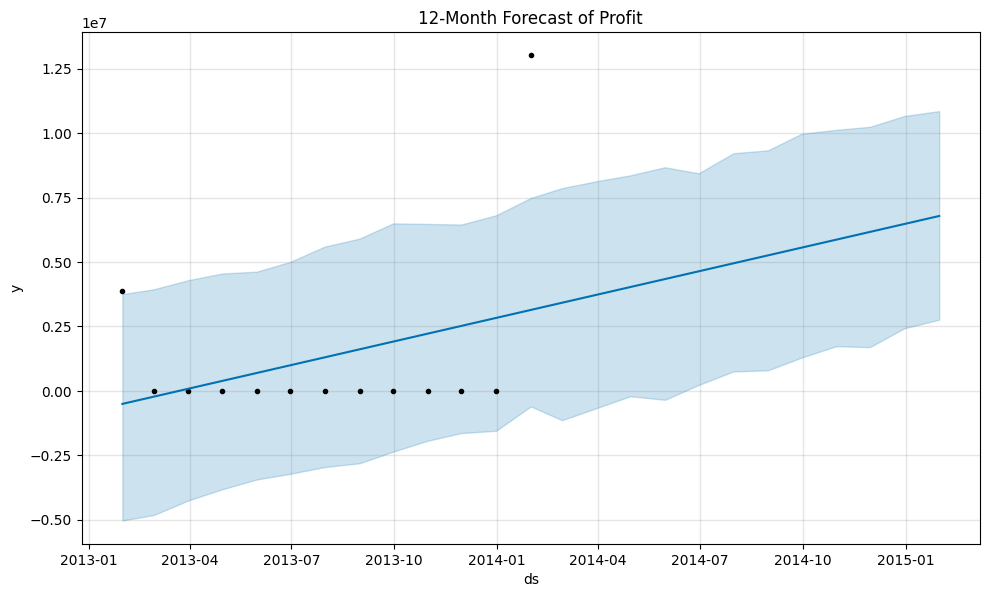

In [6]:
# Step 1: Prepare the data
df = pd.read_csv("financials_processed.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
monthly_data = df.groupby(pd.Grouper(key='Date', freq='ME')).agg({'Profit ($)': 'sum'}).reset_index()

# Prophet expects columns 'ds' and 'y'
monthly_data = monthly_data.rename(columns={'Date': 'ds', 'Profit ($)': 'y'})

# Step 2: Fit Prophet model
model = Prophet()
model.fit(monthly_data)

# Step 3: Make future dataframe
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

# Step 4: Plot
model.plot(forecast)
plt.title("12-Month Forecast of Profit")
plt.show()


In [8]:
clean_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].drop_duplicates(subset='ds')

clean_forecast.to_csv("forecast_profit.csv", index=False)


In [9]:
# Monthly actuals
actuals = df.groupby(pd.Grouper(key='Date', freq='M'))['Profit ($)'].sum().reset_index()
actuals.columns = ['ds', 'actual_profit']

# Merge with forecast
combined = pd.merge(forecast[['ds', 'yhat']], actuals, on='ds', how='inner')
combined.to_csv("forecast_vs_actual.csv", index=False)

<ipython-input-9-93c1117cb9e2>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  actuals = df.groupby(pd.Grouper(key='Date', freq='M'))['Profit ($)'].sum().reset_index()
